In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

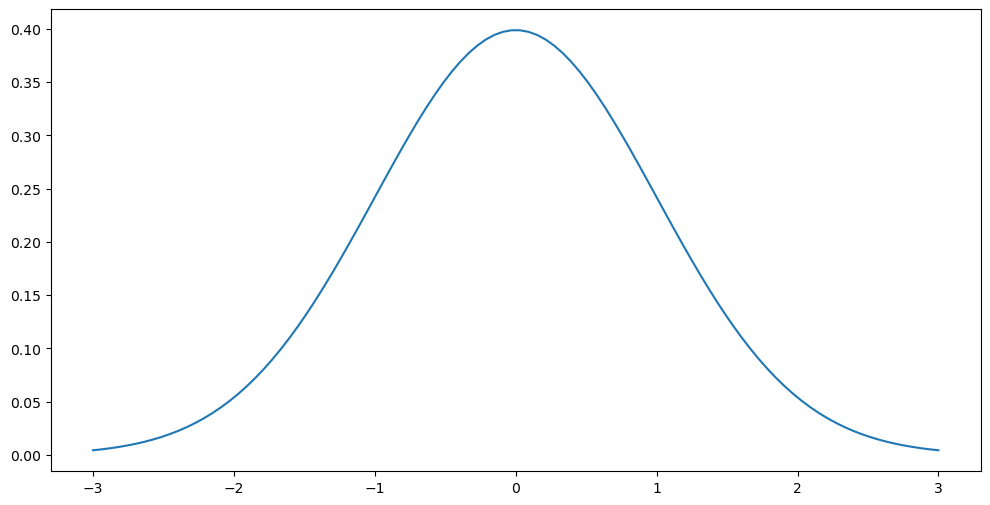

In [1]:
# Normal distribution
# 1/(2πσ**2) • exp(-1/(2σ**2) • (x - µ)**2)
def func(x, µ, σ):
    return (2 * np.pi * σ ** 2) ** -0.5 * np.exp(-(2 * σ ** 2) ** -1 * (x - µ) ** 2)

µ, σ = 0, 1
x = np.linspace(-3 * σ, 3 * σ, 100)
y = func(x, µ, σ)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y)
display()

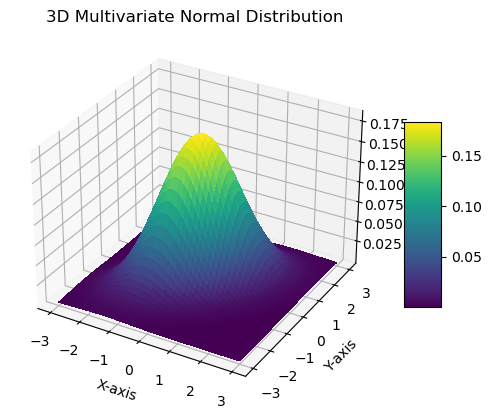

In [26]:
# Note: this is not very intuitive compared to the formula in the book
# X ~ (600, 600, 2)
# mean ~ (2,)
# cov ~ (2, 2)
def multivariate_normal_pdf(X, mean, cov):
    n = mean.shape[0]               # 2
    diff = X - mean                 # diff ~ (600, 600, 2); broadcasting
    inv_cov = np.linalg.inv(cov)    # inv_cov ~ (2, 2)
    det_cov = np.linalg.det(cov)    # det_cov ~ (); scalar

    # normalization_factor ~ (); scalar
    normalization_factor = 1 / ((2 * np.pi) ** (n / 2) * np.sqrt(det_cov))

    # Diff is a 600x600 2-element vectors, assumed to be a column-vector. Denoted `v`.
    # Let's denote inv_cov as `b`.
    # A dot-product is calculated for each of those, by doing v^Tb,
    # which returns a row vector of 2 elements.
    # This operation is broadcasted to all 600x600 entries, resulting in:
    # temp ~ (600, 600, 2)
    temp = np.dot(diff, inv_cov)
    # Note the multiplication here is simply element-wise multiplication
    # np.sum(..., axis=-1) collapses the last (right-most) axis, resulting in 600x600. Hence:
    # exponent ~ (600, 600)
    exponent = -0.5 * np.sum(temp * diff, axis=-1)
    # return ~ (600, 600)
    return normalization_factor * np.exp(exponent)

# Mean vector and covariance matrix
mean = np.array([0, 0])
cov = np.array([[1, 0.5],
                [0.5, 1]])

# Create a grid of points
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))

# Evaluate the multivariate normal distribution at each point
z = multivariate_normal_pdf(pos, mean, cov)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(x, y, z, cmap='viridis', linewidth=0, antialiased=False)

fig.colorbar(surface, shrink=0.5, aspect=5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('3D Multivariate Normal Distribution')
plt.show()

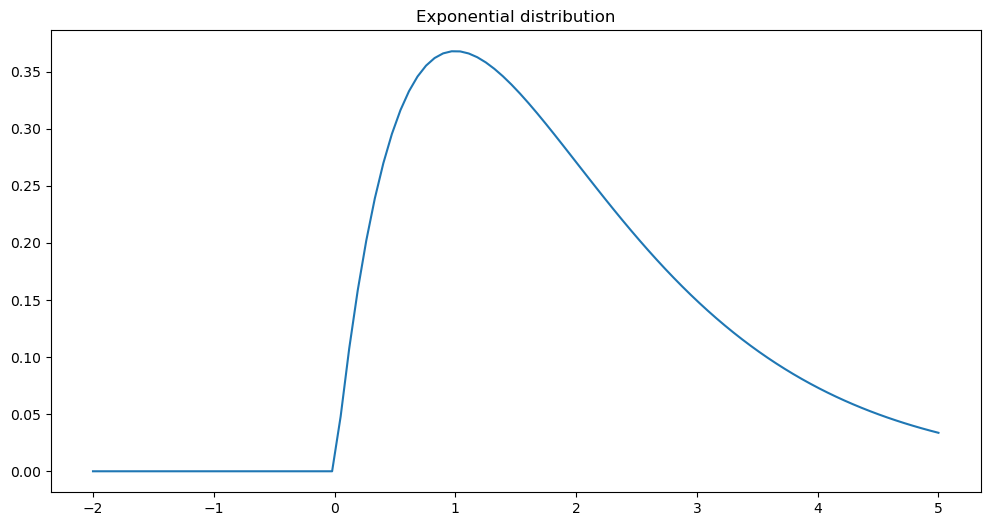

In [43]:
# Exponential distribution
# f(x; λ) = λ * e^(-λx) for all X ≥ 0 and 0 otherwise
def func(x, λ):
    return λ * np.maximum(x, 0) * np.exp(-λ * x)

λ = 1
x = np.linspace(-2, 5, 100)
y = func(x, λ)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y)
ax.set_title('Exponential distribution')
display()

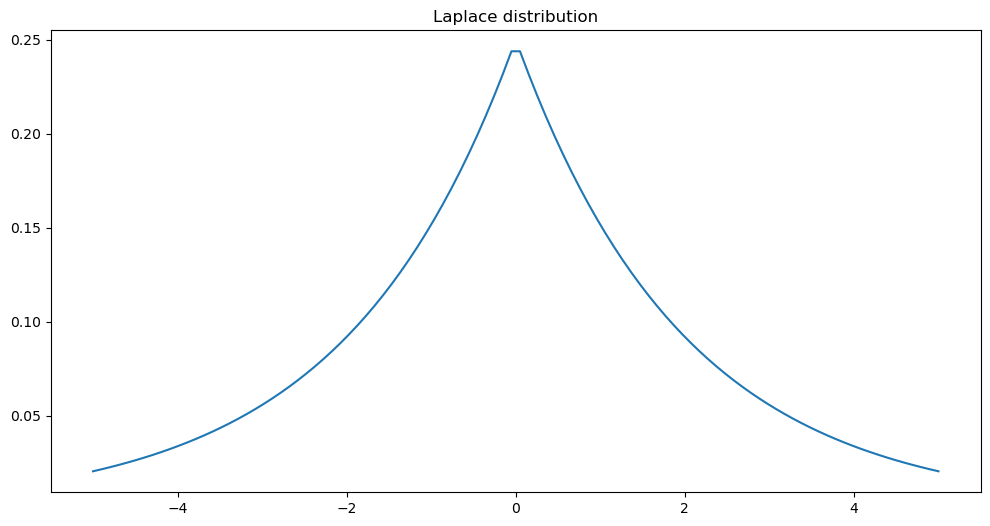

In [52]:
# Laplace
# Laplace(x; µ, γ) = 1/2γ • e^(-|x-µ|/γ)
def func(x, µ, γ):
    return 1/(2*γ) * np.exp(-np.abs(x-µ) / γ)

µ = 0
γ = 2
x = np.linspace(-5, 5, 100)
y = func(x, µ, γ)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y)
ax.set_title('Laplace distribution')
display()

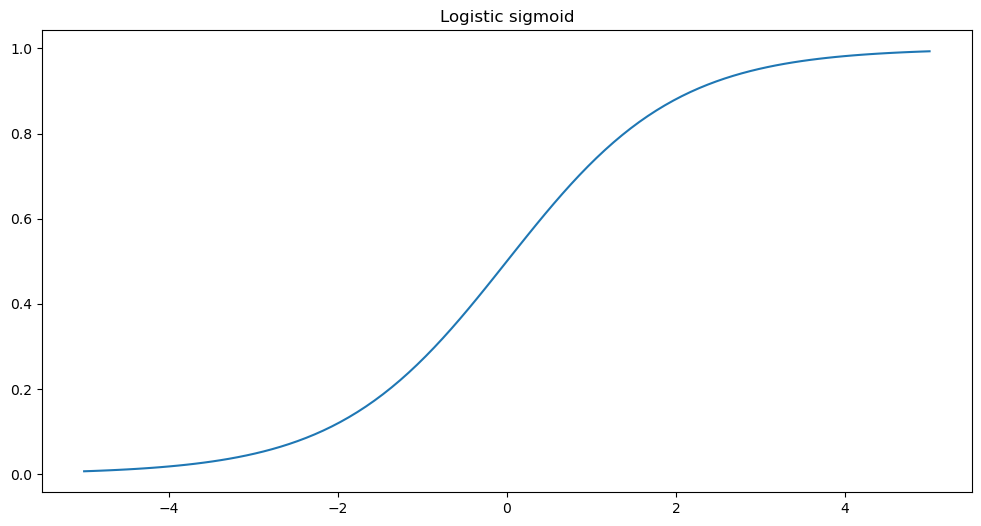

In [54]:
# logistic sigmoid := σ(x) = 1 / (1 + exp(-x))
def func(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5, 100)
y = func(x)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y)
ax.set_title('Logistic sigmoid')
display()

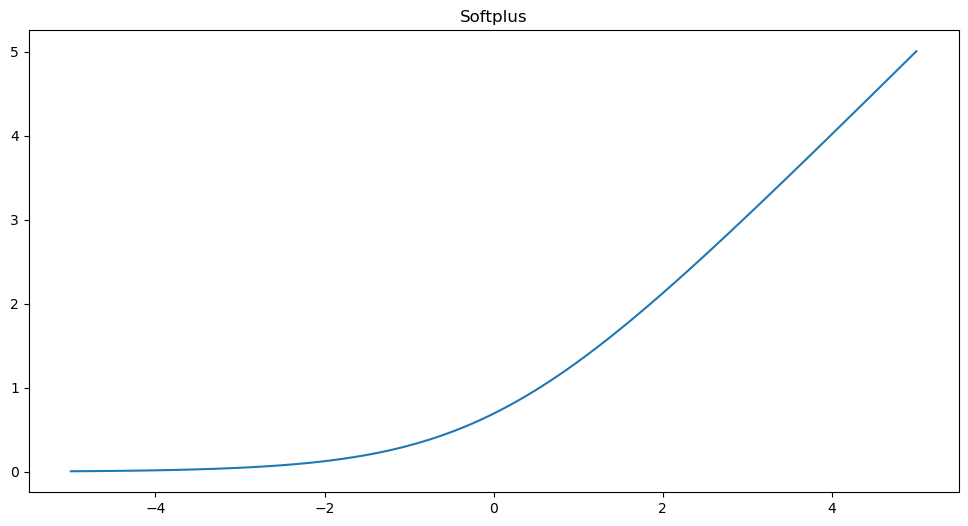

In [58]:
# Softplus function := ζ(x) = log(1+exp(x))
# It is a smoother version of the function max(0, x)
def func(x):
    return np.log(1 + np.exp(x))

x = np.linspace(-5, 5, 100)
y = func(x)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y)
ax.set_title('Softplus')
display()